In [2]:
from utils import extract_frames
from deeptrack.models import LodeSTAR
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
d:\miniconda3\envs\ml\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")


In [3]:
%matplotlib inline


In [4]:
def detect(frame, model, alpha=0.5, cutoff=0.99):    
    detections = model.predict_and_detect(frame[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]        
    return detections

In [8]:
frames = extract_frames("data\\videos\\04hz left.avi")
model = LodeSTAR(input_shape=(None, None, 3))
model.load_weights("./model/weights")

In [11]:
alpha = 0.1
cutoff = 0.9999

1/1 [==============================] - 0s 175ms/step


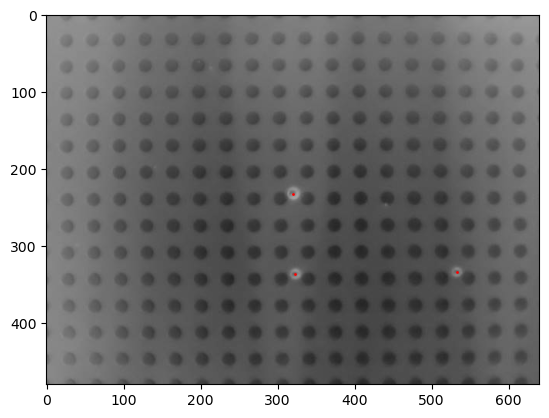

In [12]:
sample = frames[0]
sample_detections = detect(sample, model, alpha=alpha, cutoff=cutoff)
plt.imshow(sample)
plt.scatter(sample_detections[:, 1], sample_detections[:, 0], color="r", s=1)

In [13]:
detected = [detect(frame, model, alpha=alpha, cutoff=cutoff) for frame in frames[:100]]

1/1 [==============================] - 0s 199ms/step


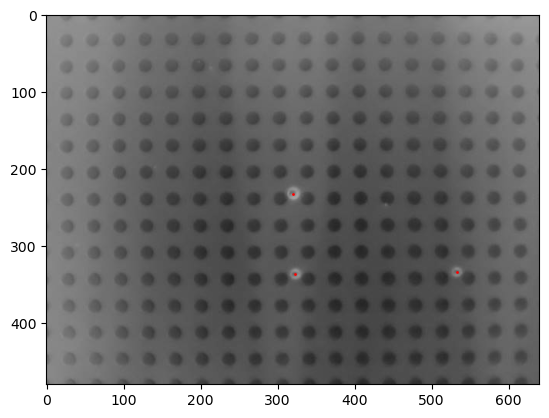

In [18]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    # ax.set_xlim(0., 0.1)
    # ax.set_ylim(0.7, 0.75)
    ax.imshow(frames[i], cmap="gray")
    ax.scatter(detected[i][:, 1], detected[i][:, 0], color="r", s=1)

ani=animation.FuncAnimation(fig, animate, interval=1000/56.95, frames=range(100))
ani.save('detected.gif', writer='pillow')

In [46]:
spots = []
for i, frame in enumerate(detected):
    for spot in frame:
        spots.append([i, spot[1], spot[0]])

In [47]:
import pandas as pd
spots_df = pd.DataFrame(spots, columns=["frame", "y", "x"])

In [48]:
from laptrack import LapTrack

In [55]:
lt = LapTrack(gap_closing_max_frame_count=5)
track_df, _, _ = lt.predict_dataframe(spots_df, ["y", "x"], only_coordinate_cols=False)
track_df = track_df.reset_index()


In [56]:
track_df

,frame,index,frame_y,y,x,tree_id,track_id
0,0,0,0,319.980469,231.780853,0,0
1,0,1,0,532.736328,334.237518,1,1
2,0,2,0,322.686676,336.690887,2,2
3,1,0,1,317.916229,233.246613,0,0
4,1,1,1,531.202942,334.805878,1,1
...,...,...,...,...,...,...,...
330,98,2,98,248.250015,338.760040,2,2
331,98,3,98,391.101807,373.059296,1,1
332,99,0,99,552.991516,240.119690,3,3
333,99,1,99,171.253220,277.005188,0,0


In [57]:
ntracks = track_df["track_id"].nunique()

In [61]:
tracks = []
for track_id in range(ntracks):
    track = track_df[track_df["track_id"] == track_id]
    tracks.append(track)

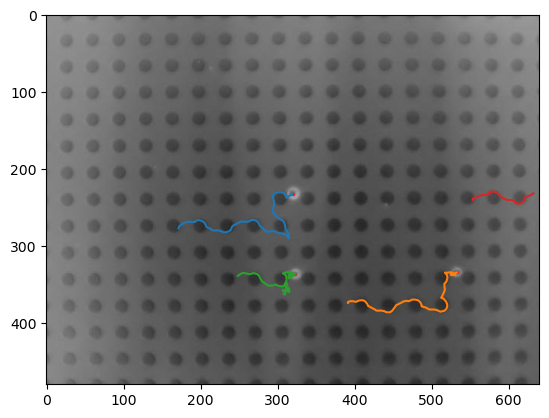

In [60]:
fig, ax = plt.subplots()

def animate(i):
    fig.clear()
    ax = fig.add_subplot(111)
    # ax.set_xlim(0., 0.1)
    # ax.set_ylim(0.7, 0.75)
    ax.imshow(frames[i], cmap="gray")
    ax.scatter(detected[i][:, 1], detected[i][:, 0], color="r", s=1)
    for track in tracks:
        ax.plot(track["y"], track["x"])

ani=animation.FuncAnimation(fig, animate, interval=1000/56.95, frames=range(100))
ani.save('detected.gif', writer='pillow')

In [63]:
tracks[0]

,frame,index,frame_y,y,x,tree_id,track_id
0,0,0,0,319.980469,231.780853,0,0
3,1,0,1,317.916229,233.246613,0,0
6,2,0,2,314.962341,234.834274,0,0
9,3,0,3,312.147369,237.154709,0,0
12,4,0,4,311.737640,237.596619,0,0
...,...,...,...,...,...,...,...
317,95,1,95,173.195358,273.305084,0,0
321,96,1,96,171.839661,274.629150,0,0
325,97,1,97,171.561981,275.765472,0,0
329,98,1,98,171.634888,276.082001,0,0
